## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any iimage into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

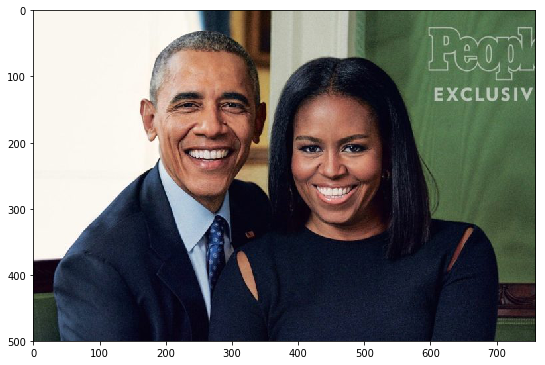

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image_2)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


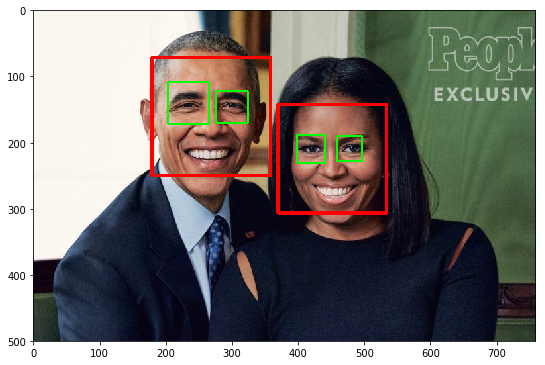

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_eye.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
gray = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 2)


# make a copy of the original image to plot detections on
image_with_detections = image_2.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image_with_detections,
                      (x+ex, y+ey),
                      (x+ex+ew, y+ey+eh),
                      (0, 255, 0), 2)

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [27]:
import torch
from models import Net

net = Net()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
#net.load_state_dict(torch.load('saved_models/4c_3f_adagrad_MSE_keypoints_model_1.pt'))
net.load_state_dict(torch.load('saved_models/4c_3f_adagrad_MSE_keypoints_model_2.pt'))
#net.load_state_dict(torch.load('saved_models/4c_3f_110e_adagrad_MSE_keypoints_model_3.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(10, 10), stride=(2, 2))
  (conv3): Conv2d(32, 64, kernel_size=(15, 15), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=136, bias=True)
  (drop): Dropout2d(p=0.1)
)

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

**Hint**: The sizes of faces detected by a Haar detector and the faces your network has been trained on are of different sizes. If you find that your model is generating keypoints that are too small for a given face, try adding some padding to the detected `roi` before giving it as input to your model.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




In [28]:
for (x,y,w,h) in faces:
    print(x, y, w ,h)
    y = y - 0.25 * h
    x = x - 0.25 * w
    h = 1.5 * h
    w = 1.5 * w
    print(x, y, w ,h)

179 71 179 179
134.25 26.25 268.5 268.5
369 142 164 164
328.0 101.0 246.0 246.0


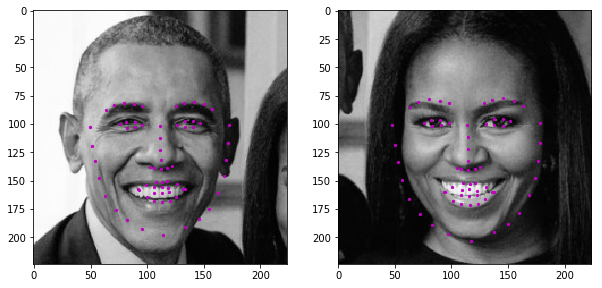

In [29]:
image_copy = np.copy(image_2)
output = []
fig = plt.figure(figsize=(10, 10))
i = 0

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image
    # Crop 1.5 times bigger
    
    y = int(y - 0.25 * h)
    x = int(x - 0.25 * w)
    h = int(1.5 * h)
    w = int(1.5 * w)
    ori_h = h
    ori_w = w

    copy = image_copy[y:y+h, x:x+w]
    #copy = cv2.copyMakeBorder(copy, 112, 112, 112, 112, cv2.BORDER_CONSTANT)
    roi = copy

    ## TODO: Convert the face region from RGB to grayscale

    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)

    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]

    roi = roi/255.0

    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)

    if h > w:
        new_h, new_w = 224 * h/w, 224
    elif h < w:
        new_h, new_w = 224, 224 * w/h
    else:
        new_h, new_w = 224, 224
    new_h, new_w = int(new_h), int(new_w)
    roi = cv2.resize(roi, (new_w, new_h))

    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)

    h = new_h
    w = new_w
    new_h, new_w = 224, 224
    if h == new_h:
        top = 0
    else:
        top = np.random.randint(0, h - new_h)
    if w == new_w:
        left = 0
    else:
        left = np.random.randint(0, w - new_w)
    roi = roi[top: top + new_h, left: left + new_w]

    
    ## TODO: Make facial keypoint predictions using your loaded, trained network

    if(len(roi.shape) == 2):
        roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
    roi = roi.transpose((2, 0, 1))
    roi = torch.from_numpy(roi)
    roi = roi.type(torch.FloatTensor)
    roi = torch.unsqueeze(roi, dim=0)
    output_pts = net(roi)
    output_pts = output_pts.view(output_pts.size()[0], 68, -1)
    output_pts = torch.squeeze(output_pts)

    ## TODO: Display each detected face and the corresponding keypoints

    output_pts = output_pts.data.numpy()
    output_pts = output_pts * 50.0 + 100
    roi = roi.numpy()
    roi = np.squeeze(roi)
    ax = fig.add_subplot(1, 2, i+1)
    ax.imshow(roi, cmap='gray')
    ax.scatter(output_pts[:,0], output_pts[:,1], s=20, marker='.', c='m')
    i += 1
    
    output_pts = output_pts * [ori_w / w, ori_h / h] + [x, y]
    output.append(output_pts)
        


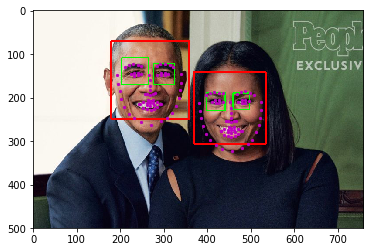

In [30]:
plt.imshow(image_with_detections)
for i in range(len(output)):
    plt.scatter(output[i][:,0], output[i][:,1], s=20, marker='.', c='m')